In [1]:
# Operating System
import os

import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt
%matplotlib inline

# Strings
import re

# Load original data

In [2]:
#file_path = ".\data\train.csv"
file_path = os.path.join('data', 'train.csv')


# # Option 1 for reading a sample of the file
# n_total_rows = 2437645
# prc_rows_to_read = 10
# n_rows_to_read = int(prc_rows_to_read/100*n_total_rows)
# n_rows_to_skip = n_total_rows - n_rows_to_read

# random.seed(178) # this is to get always the same sample. can be removed if we want the sample to change
# list_of_rows_to_skip = random.sample(
#     range(1, n_total_rows-1), # this is a range from the first row after the header, to the last row on the file
#     n_rows_to_skip # this is the number of rows we want to sample, i.e, to skip
# )


# Option 2 for reading a sample of the file
# sample 10% of the rows
p = 1

try:
    df_original = pd.read_csv(file_path, 
                             skiprows = lambda row_num: random.random() > p and row_num > 0, 
                             #nrows = 10000, 
                             header=0,
                             warn_bad_lines=True)
except:
    print('Ooops!!! We got an error!')


# Transform data to analysis

In [3]:
remane_columns_dict = {'VehicleSearchedIndicator': 'search', 
                       'ContrabandIndicator': 'target', 
                       'Department Name': 'departm',
                       'InterventionDateTime': 'date',
                       'InterventionLocationName': 'local',
                       'InterventionReasonCode': 'reason',
                       'ReportingOfficerIdentificationID': 'officerID',
                       'ResidentIndicator': 'state_res',
                       'SearchAuthorizationCode': 'search_reason',
                       'StatuteReason': 'stop_reason',
                       'SubjectAge': 'age',
                       'SubjectEthnicityCode': 'ethnic',
                       'SubjectRaceCode': 'race',
                       'SubjectSexCode': 'sex',
                       'TownResidentIndicator': 'town_res'
                      }

In [4]:
def simple_clean(doc, regex_list=[("[\.\?\(\)\|:;_!@/*\-]", " "), (" +", " ")] ):
    
    # Make sure it is a string!
    doc = str(doc)
    
    # remove or replace characters
    for regex in regex_list:
        doc = re.sub(regex[0], regex[1], doc)
    # lowercase
    doc = doc.lower()
    # Trim
    doc = doc.strip()
    # tokenize
    #words = tokenizer.tokenize(doc)
    # remove punctuation
    #words = list(filter(lambda x: x not in string.punctuation, words))
    # stem
    #stems = list(map(stemmer.stem, words))
    #new_doc = " ".join(stems)
    new_doc = doc
    return new_doc

In [5]:
def data_transformer(df_original: pd.DataFrame, columns_dict: dict) -> pd.DataFrame:
    """Transforms the original DataFrame to make it suited for data analysis.
    
    Args:
        df_original (pd.DataFrame):  Original DataFrame, as imported by pd.read_csv().
        columns_dict (dict): Correspondence between old a new column names.
        
    Returns:
        df (pd.DataFrame): Transformed DataFrame, ready for data analysis.
        
    TODO:
        * to do list
        
    """
    
    df = df_original.copy()
    
    # change column names
    df = df.rename(columns = columns_dict)
    
    # convert date to pd.datetime
    df.date = pd.to_datetime(df.date)
    
    # convert Intervention DateTime to index of the DataFrame
    #df = df.set_index('date').sort_index()
    
    # Clean strings from special characters and multiple spaces
    df.local = df.local.apply(simple_clean)
    df.departm = df.departm.apply(simple_clean)
    df.stop_reason = df.stop_reason.apply(simple_clean)
   
    return df

df = data_transformer(df_original, remane_columns_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473643 entries, 0 to 2473642
Data columns (total 15 columns):
search           bool
target           bool
departm          object
date             datetime64[ns]
local            object
reason           object
officerID        object
state_res        bool
search_reason    object
stop_reason      object
age              float64
ethnic           object
race             object
sex              object
town_res         bool
dtypes: bool(4), datetime64[ns](1), float64(1), object(9)
memory usage: 217.0+ MB


### Useful variables

In [42]:
dfs = df[df.search==True].reset_index()
dfs.sample(5)

,index,search,target,departm,date,local,reason,officerID,state_res,search_reason,stop_reason,age,ethnic,race,sex,town_res
2218,72795,True,True,waterbury,2013-11-21 11:45:00,waterbury,I,2290,True,O,moving violation,28.0,N,W,F,False
53602,1742163,True,False,new haven,2017-05-15 16:09:00,new haven,V,6569,True,C,other,32.0,N,B,M,True
45054,1502648,True,True,west hartford,2016-12-04 21:54:00,west hartford,V,1000002165,True,O,stc violation,23.0,N,B,M,False
29299,968519,True,False,west haven,2015-12-20 00:34:41,west haven,E,1000324,True,C,window tint,32.0,H,W,M,False
13233,443368,True,False,new haven,2014-07-08 18:00:00,new haven,V,PSC45169,True,C,registration,28.0,N,B,M,True


In [6]:
nobs = df.shape[0]

In [7]:
nsearch = df[df.search==True].shape[0]

In [43]:
target_global_mean = dfs.target.mean()
target_global_mean

0.3325124115554513

In [8]:
print("Number of car stops: {:,d}".format(df.shape[0]).replace(',', ' '))


Number of car stops: 2 473 643


# 'SubjectEthnicityCode': 'ethnic'

In [9]:
df.ethnic.value_counts(dropna=False)

N    2099632
H     328450
M      45561
Name: ethnic, dtype: int64

In [10]:
df.ethnic.value_counts(dropna=False).sum() == nobs

True

In [11]:
df.ethnic.value_counts(normalize=True, dropna=False).apply(lambda x: x*100)

N    84.880154
H    13.277987
M     1.841858
Name: ethnic, dtype: float64

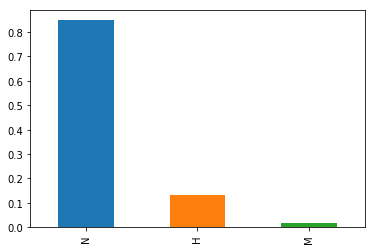

In [12]:
df.ethnic.value_counts(normalize=True, dropna=False).plot.bar();

# 'SubjectRaceCode': 'race'

In [13]:
df.race.value_counts(dropna=False)

W    2018931
B     386325
A      48641
I      19746
Name: race, dtype: int64

In [14]:
df.race.value_counts(dropna=False).sum() == nobs

True

In [15]:
df.race.value_counts(normalize=True, dropna=False)*100

W    81.617719
B    15.617654
A     1.966371
I     0.798256
Name: race, dtype: float64

In [16]:
df.race.isna().sum()

0

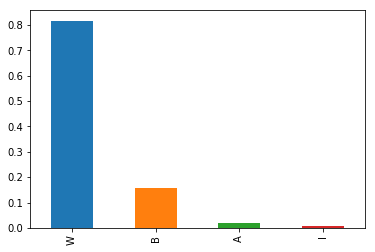

In [17]:
df.race.value_counts(normalize=True, dropna=False).plot.bar();

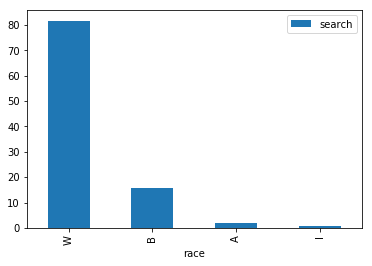

In [18]:
(df.groupby('race')[['search']].count()
                               .apply(lambda x: 100*x/x.sum(), axis=0)
                               .sort_values(by='search',ascending=False)
                               .plot.bar());

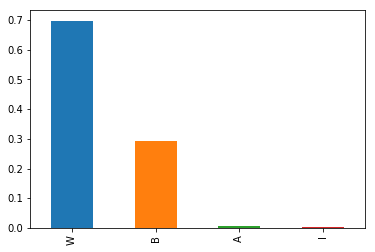

In [19]:
df[df.search==True].race.value_counts(normalize=True, dropna=False).plot.bar();

In [20]:
x = df.race.value_counts(normalize=True, dropna=False).index.values
x

array(['W', 'B', 'A', 'I'], dtype=object)

In [21]:
y1 = df.race.value_counts(normalize=True, dropna=False).values*100
y1

array([81.61771929, 15.6176538 ,  1.96637106,  0.79825585])

In [22]:
y2 = df[df.search==True].race.value_counts(normalize=True, dropna=False).values*100
y2

array([69.74447181, 29.31993797,  0.64891912,  0.2866711 ])

<BarContainer object of 4 artists>

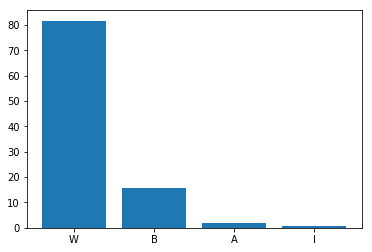

In [23]:
plt.bar(x, y1)

In [24]:
df.groupby('race').search.agg(['count','sum'])

,count,sum
race,,
A,48641,498.0
B,386325,22501.0
I,19746,220.0
W,2018931,53524.0


## 'SubjectRaceCode': 'race'

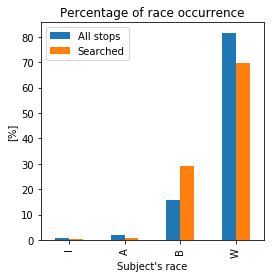

In [47]:
(df.groupby('race').search.agg(['count','sum'])
                          .apply(lambda col: 100*col/col.sum(), axis=0)
                          .sort_values(by='count')
                          .plot.bar(figsize=(4,4)))

plt.title('Percentage of race occurrence')
plt.xlabel("Subject's race")
plt.ylabel("[%]")

plt.legend(['All stops', 'Searched'])

plt.savefig(os.path.join('plots', 'discrimination_race_percentage_all_searched.png'));


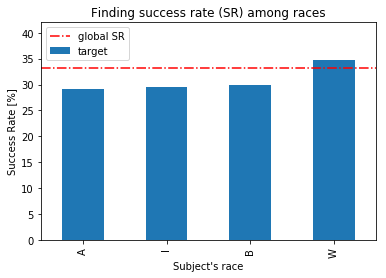

In [74]:
dfs.groupby('race').target.mean().apply(lambda x: x*100).sort_values().to_frame().plot.bar(label='target mean')

plt.axhline(y=target_global_mean*100, color='r', linestyle='-.', label='global SR')

plt.title('Finding success rate (SR) among races')
plt.xlabel("Subject's race")
plt.ylabel("Success Rate [%]")

plt.ylim(0,42)

plt.legend(loc='upper left')

plt.savefig(os.path.join('plots', 'discrimination_race_SR.png'));

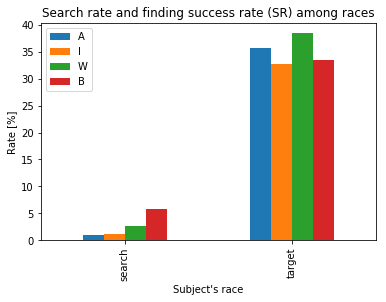

In [130]:
# create groupby dataframe
df_aux = df.groupby('race')[['search', 'target']].agg(['count','sum','mean'])

#create index
idx = pd.IndexSlice

# Correct target mean to consider only those who were searched
df_aux.loc[:,idx['target','mean']] = df_aux.loc[:,idx['target','sum']] / df_aux.loc[:,idx['search','sum']]

df_aux = df_aux.loc[:,idx[:,'mean']].sort_values(by=('search','mean')).applymap(lambda x: x*100)
df_aux = df_aux.T.reset_index(level=1, drop=True)

df_aux.plot.bar()

plt.title('Search rate and finding success rate (SR) among races')
plt.xlabel("Subject's race")
plt.ylabel("Rate [%]")

plt.legend(loc='upper left')

#plt.savefig(os.path.join('plots', 'discrimination_race_SR.png'));

## 'SubjectSexCode': 'sex'

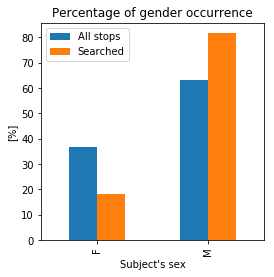

In [39]:
(df.groupby('sex').search.agg(['count','sum'])
                          .apply(lambda col: 100*col/col.sum(), axis=0)
                          .sort_values(by='count')
                          .plot.bar(figsize=(4,4)))

plt.title('Percentage of gender occurrence')
plt.xlabel("Subject's sex")
plt.ylabel("[%]")

plt.legend(['All stops', 'Searched'])

plt.savefig(os.path.join('plots', 'discrimination_sex_percentage_all_searched.png'));


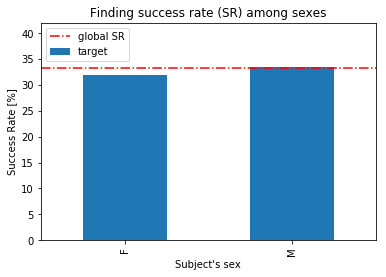

In [76]:
dfs.groupby('sex').target.mean().apply(lambda x: x*100).sort_values().to_frame().plot.bar(label='target mean')

plt.axhline(y=target_global_mean*100, color='r', linestyle='-.', label='global SR')

plt.title('Finding success rate (SR) among sexes')
plt.xlabel("Subject's sex")
plt.ylabel("Success Rate [%]")

plt.ylim(0,42)

plt.legend(loc='upper left')

plt.savefig(os.path.join('plots', 'discrimination_sex_SR.png'));

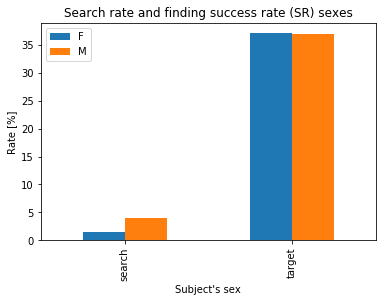

In [129]:
# create groupby dataframe
df_aux = df.groupby('sex')[['search', 'target']].agg(['count','sum','mean'])

#create index
idx = pd.IndexSlice

# Correct target mean to consider only those who were searched
df_aux.loc[:,idx['target','mean']] = df_aux.loc[:,idx['target','sum']] / df_aux.loc[:,idx['search','sum']]

df_aux = df_aux.loc[:,idx[:,'mean']].sort_values(by=('search','mean')).applymap(lambda x: x*100)
df_aux = df_aux.T.reset_index(level=1, drop=True)

df_aux.plot.bar()

plt.title('Search rate and finding success rate (SR) sexes')
plt.xlabel("Subject's sex")
plt.ylabel("Rate [%]")

plt.legend(loc='upper left')

#plt.savefig(os.path.join('plots', 'discrimination_race_SR.png'));

## 'SubjectEthnicityCode': 'ethnic'

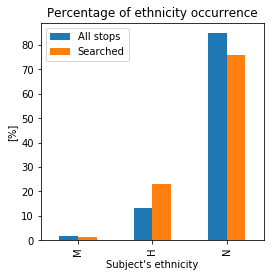

In [40]:
(df.groupby('ethnic').search.agg(['count','sum'])
                          .apply(lambda col: 100*col/col.sum(), axis=0)
                          .sort_values(by='count')
                          .plot.bar(figsize=(4,4)))

plt.title('Percentage of ethnicity occurrence')
plt.xlabel("Subject's ethnicity")
plt.ylabel("[%]")

plt.legend(['All stops', 'Searched'])

plt.savefig(os.path.join('plots', 'discrimination_ethnic_percentage_all_searched.png'));


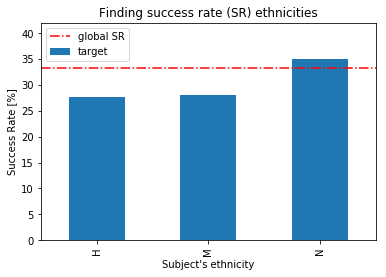

In [78]:
dfs.groupby('ethnic').target.mean().apply(lambda x: x*100).sort_values().to_frame().plot.bar(label='target mean')

plt.axhline(y=target_global_mean*100, color='r', linestyle='-.', label='global SR')

plt.title('Finding success rate (SR) ethnicities')
plt.xlabel("Subject's ethnicity")
plt.ylabel("Success Rate [%]")

plt.ylim(0,42)

plt.legend(loc='upper left')

plt.savefig(os.path.join('plots', 'discrimination_ethnic_SR.png'));

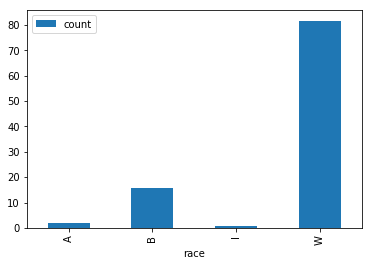

In [26]:
(df.groupby('race').search.agg(['count'])
                          .apply(lambda col: 100*col/col.sum(), axis=0)
                          .plot.bar(stacked=True))

In [27]:
kind='bar', stacked=True

SyntaxError: can't assign to literal (<ipython-input-27-2828b7a0eb13>, line 1)

In [ ]:
df.groupby('race').search.agg(['sum']).apply(lambda col: 100*col/col.sum(), axis=0).plot.bar()

# 'SubjectSexCode': 'sex'

In [ ]:
df.sex.value_counts(dropna=False)

In [ ]:
df.sex.value_counts(dropna=False).sum() == nobs

In [ ]:
df.sex.value_counts(normalize=True, dropna=False)*100

In [ ]:
df.sex.value_counts(normalize=True, dropna=False).plot.bar();